**Mielage Prediction - Regression Analysis**

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1.   mpg: continuous
2.   cylinders: multi-valued discrete
3.   displacement: continuous

4.   horsepower: continuous

5.   weight: continuous
6.   acceleration: continuous
7.model year: multi-valued discrete
8.origin: multi-valued discrete
9.car name: string (unique for each instance)











In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


DATA PREPROCESSING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [9]:
df = df.dropna()

In [10]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

<Axes: xlabel='cylinders'>

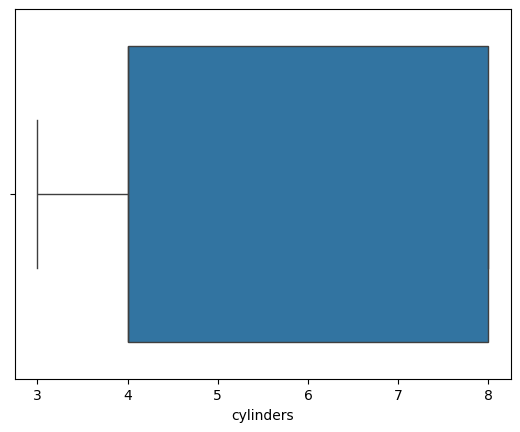

In [11]:
sns.boxplot(x="cylinders",data=df)

<Axes: xlabel='displacement'>

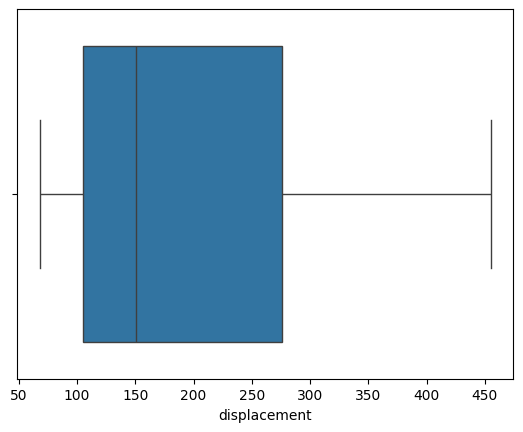

In [12]:
sns.boxplot(x="displacement",data=df)

<Axes: xlabel='horsepower'>

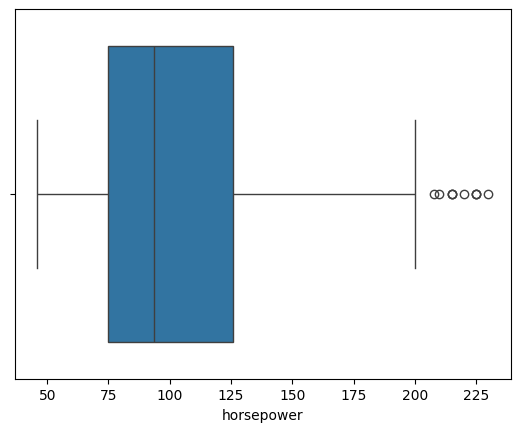

In [13]:
sns.boxplot(x="horsepower",data=df)

<Axes: xlabel='weight'>

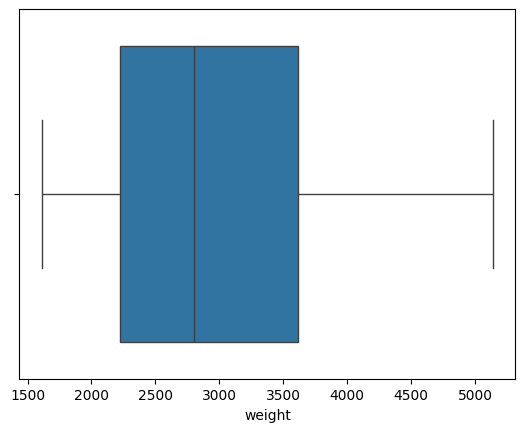

In [14]:
sns.boxplot(x="weight",data=df)

<Axes: xlabel='acceleration'>

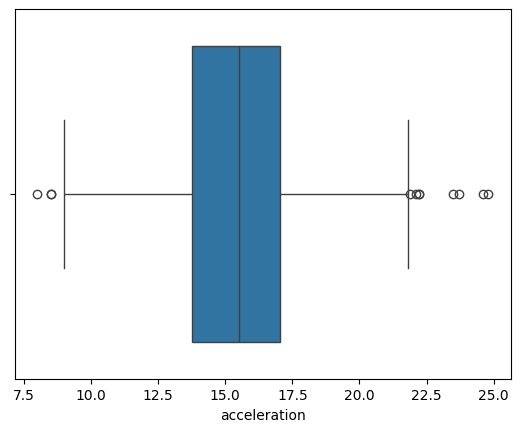

In [17]:
sns.boxplot(x="acceleration",data=df)

DATA VISUALISATION

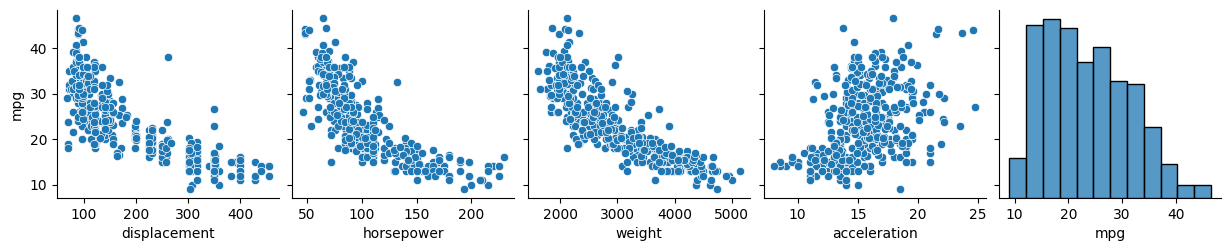

In [19]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration',	'mpg'], y_vars=['mpg'])

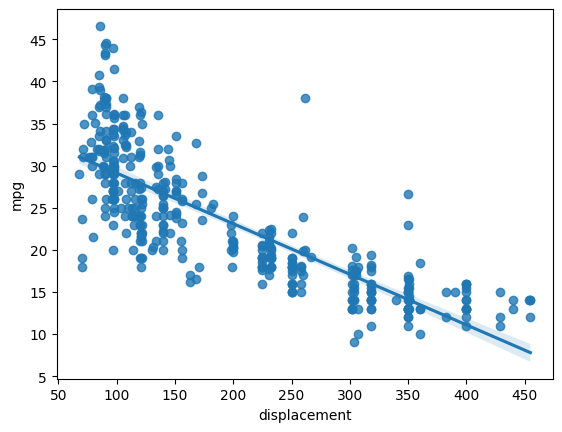

In [20]:
sns.regplot(x = 'displacement', y = 'mpg', data = df);

Define Target Variable y and Feature X

In [21]:
y = df['mpg']

In [22]:
y.shape

(392,)

In [24]:
x=df[['acceleration','displacement', 'horsepower', 'weight']]

In [25]:
x.shape

(392, 4)

Scaling Data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
s=StandardScaler()

In [28]:
s.fit(x)

StandardScaler()

In [35]:
x=s.transform(x)

In [36]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,4.350262e-16,-7.250436e-17,-1.812609e-16,-1.812609e-17
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-2.736983e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00
25%,-6.410551e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01
50%,-1.499869e-02,-4.153842e-01,-2.853488e-01,-2.052109e-01
75%,5.384714e-01,7.782764e-01,5.600800e-01,7.510927e-01
max,3.360262e+00,2.493416e+00,3.265452e+00,2.549061e+00


After Standardization Mean is Zero and Standard Deviation is One

Train Test Split Data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 2529)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
LinearRegression()

LinearRegression()

In [44]:

lr.intercept_

23.485738559737584

In [45]:
lr.coef_

array([-0.11495177, -1.05767743, -1.68734727, -4.10787617])

Mileage = 23.4 - 1.05Displacemet - 1.68Horsepower - 4.10Weight - 0.115Acceleration + error

Predict Test Data

In [47]:
y_pred = lr.predict(x_test)

In [48]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

Model Accuracy

In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred)

3.3286968643244106

In [50]:
mean_absolute_percentage_error(y_test, y_pred)

0.14713035779536746

In [51]:
r2_score(y_test, y_pred)

0.7031250746717691

**Polynomial** **Regression**

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
lr.fit(x_train2, y_train)
LinearRegression()

LinearRegression()

In [54]:
lr.intercept_

21.273364500637655

In [55]:
lr.coef_

array([-0.81225214, -2.76070596, -5.00559628, -1.36884133, -0.90542822,
       -0.17337823,  1.41680398,  1.24596571, -0.12475017,  1.35064048])

In [57]:
y_pred_poly = lr.predict(x_test2)

Model Accuracy

In [59]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [60]:
mean_absolute_error(y_test, y_pred_poly)

2.7887147720295977

In [61]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.12074018342938689

In [62]:
r2_score(y_test, y_pred_poly)

0.7461731314563802

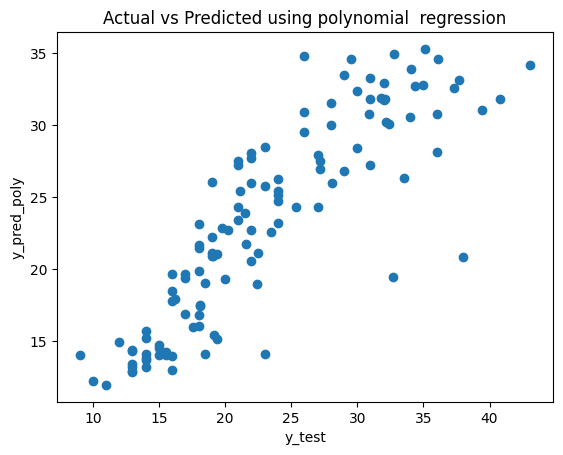

In [71]:
plt.scatter(y_test,y_pred_poly)
plt.xlabel('y_test')
plt.ylabel('y_pred_poly')
plt.title('Actual vs Predicted using polynomial  regression')
plt.show()